In [66]:
#loading libraries
library(ggplot2)
library(ISLR)
library(tree)
library(randomForest)
library(gbm)
library(glmnet)
library(dplyr)
library(tidyverse)

In [67]:
#Exercise 3 (p.332, Chap.8)

In [68]:
scale <- seq(0, 1, 0.001)
index <- 2 * scale * (1 - scale)
error <- 1 - pmax(scale, 1 - scale)
entropy <- - (scale * log(scale) + (1 - scale) * log(1 - scale))


Warning message:
"Removed 2 rows containing missing values (geom_point)."


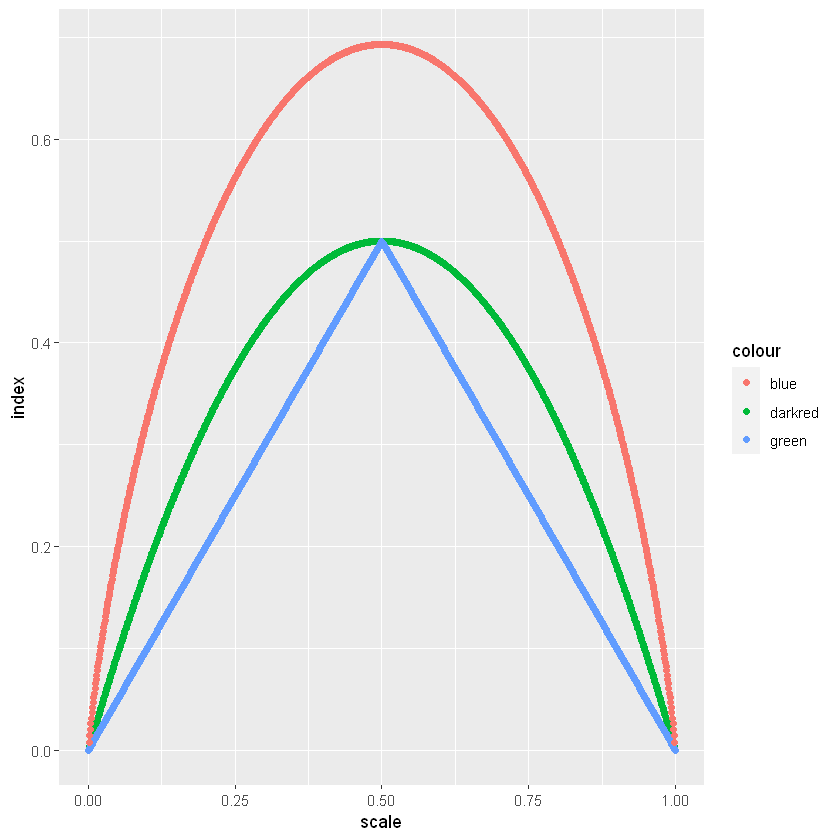

In [69]:
data<-data.frame(scale,index,error,entropy)
ggplot(data,aes(x=scale))+
geom_point(aes(y=index,color = "darkred"))+
geom_point(aes(y=error,color='green'))+
geom_point(aes(y=entropy,color='blue'))

In [70]:
#Exercise 5 (p.332, Chap.8)

In [71]:
redPoints=c(0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7,0.75)
red_pop<-0
green_pop<-0
for (i in redPoints){
    if (i>=0.5){
        red_pop=red_pop+1
    }else{
        green_pop=green_pop+1
    }
}

In [72]:
if(red_pop>green_pop){
    print('majority is Red points')
}else{
    print('majority is green points')
}

[1] "majority is Red points"


In [73]:
avg=mean(p_red)
if(avg>=0.5){
    print('majority is Red points')
}else{
    print('majority is green points')
}

[1] "majority is green points"


In [74]:
#Exercise 8 (p.333, Chap.8)

In [75]:
#a.
set.seed(123)
index <- sample(1:nrow(Carseats), nrow(Carseats)*2 / 3)
train <- Carseats[index, ]
test <- Carseats[-index, ]


Regression tree:
tree(formula = Sales ~ ., data = train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "CompPrice"   "Advertising"
Number of terminal nodes:  19 
Residual mean deviance:  2.334 = 576.5 / 247 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.36000 -0.99910  0.07471  0.00000  0.88490  4.03100 

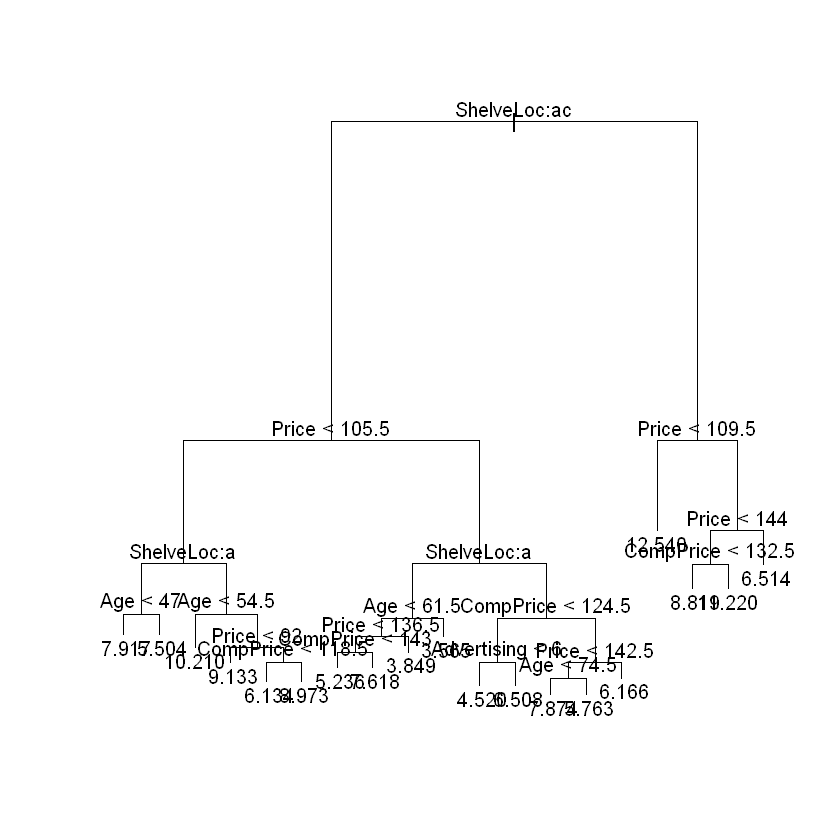

In [76]:
#b.
TM <- tree(Sales ~ ., data = train)
summary(TM)
plot(TM)
text(TM)

In [77]:
#prediction
results <- predict(TM, newdata = test)
MSE<-mean((results - test$Sales)^2)

In [78]:
print(MSE)

[1] 4.226269


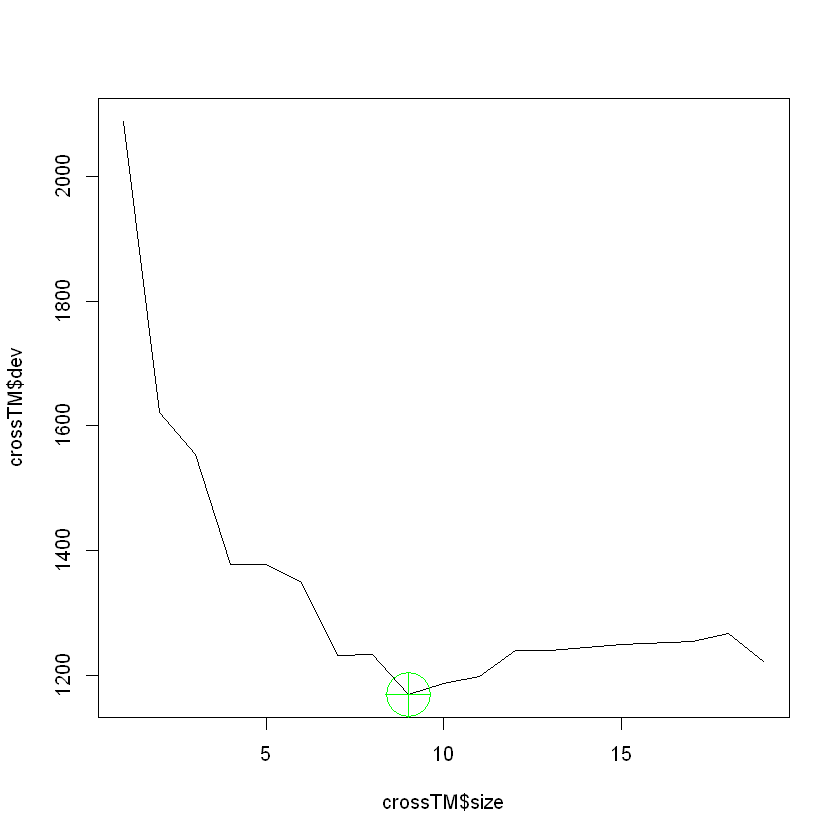

In [84]:
#c.
set.seed(123)
crossTM <- cv.tree(TM)
plot(crossTM$size, crossTM$dev, type = "l")
dev_min <- which.min(crossTM$dev)
points(crossTM$size[dev_min], crossTM$dev[dev_min], col = "green", cex = 5, pch = 10)

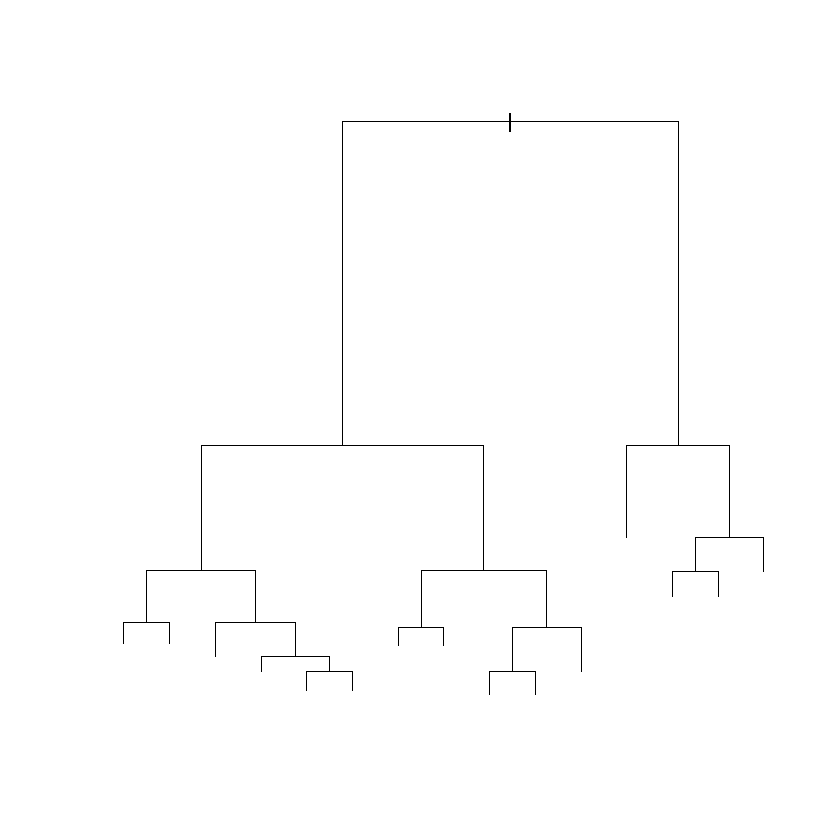

In [85]:
pruneTM <- prune.tree(TM, best = 15)
plot(pruneTM)

In [87]:
#prediction and interpretation
results <- predict(pruneTM, newdata = test)
MSE<-mean((results - test$Sales)^2)

In [88]:
print(MSE)

[1] 4.668153


In [96]:
#d.
set.seed(123)
RF <- randomForest(Sales ~ ., data = train, mtry = 5, ntree = 500, importance = TRUE)
resuts <- predict(RF, newdata = test)
MSE<-mean((resuts - test$Sales)^2)

In [97]:
print(MSE)

[1] 2.490189


In [98]:
importance(RF)
#ShelveLoc is the most important factor

,%IncMSE,IncNodePurity
CompPrice,24.3232508,228.98713
Income,5.4548678,120.96080
Advertising,16.5186715,168.30805
Population,-1.7871372,89.55612
Price,47.6124123,485.31772
ShelveLoc,52.6431285,578.99368
Age,17.6826790,229.50915
Education,3.3347722,81.53584
Urban,0.6312322,12.39726
US,2.1329933,14.00422


In [104]:
#e.
set.seed(123)
RForest <- randomForest(Sales ~ ., data = train, mtry = 5, ntree = 100, importance = TRUE)
resuts <- predict(RForest, newdata = test)
MSE<-mean((resuts - test$Sales)^2)

In [105]:
print(MSE)

[1] 2.449412


In [106]:
importance(RF)

,%IncMSE,IncNodePurity
CompPrice,15.9853418,219.82311
Income,4.5091777,142.73144
Advertising,14.8981387,169.55347
Population,-1.5623609,118.40007
Price,37.8760265,443.58854
ShelveLoc,48.0483484,481.36093
Age,15.6991927,249.81769
Education,1.9287335,96.56553
Urban,-0.7371231,18.31949
US,3.1488564,26.93554


In [28]:
#Exercise 9 (p.334, Chap.8)

In [107]:
set.seed(123)
index  <- sample(1:nrow(OJ), 800)
train <- OJ[index, ]
test <- OJ[-index, ]

In [108]:
MT <- tree(Purchase ~ ., data = train)

In [109]:
summary(MT)


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7625 = 603.9 / 792 
Misclassification error rate: 0.165 = 132 / 800 

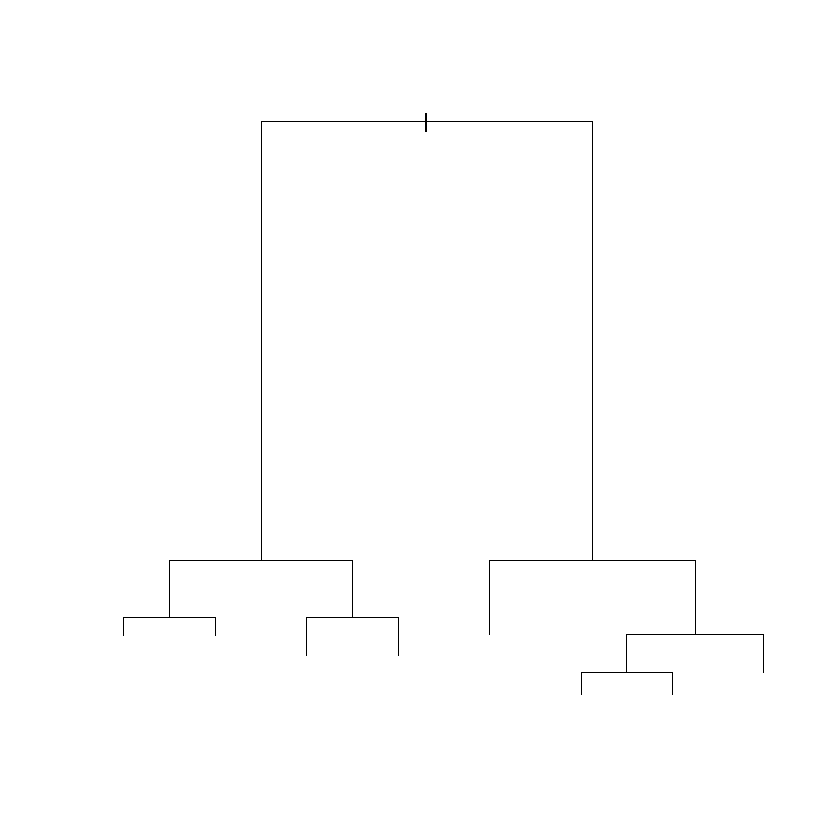

In [111]:
plot(MT)

In [113]:
#f.

CVM <- cv.tree(MT, FUN = prune.misclass)
CVM

$size
[1] 8 5 3 2 1

$dev
[1] 141 138 161 165 313

$k
[1] -Inf    0    8   11  154

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

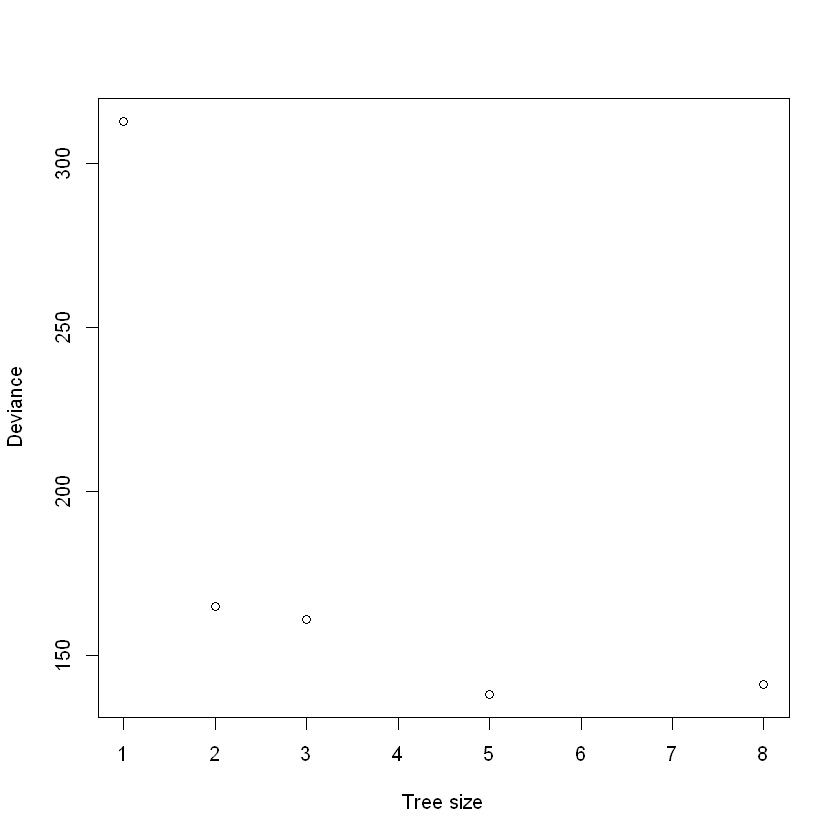

In [115]:
#g.
plot(CVM$size, CVM$dev, xlab = "Tree size", ylab = "Deviance")

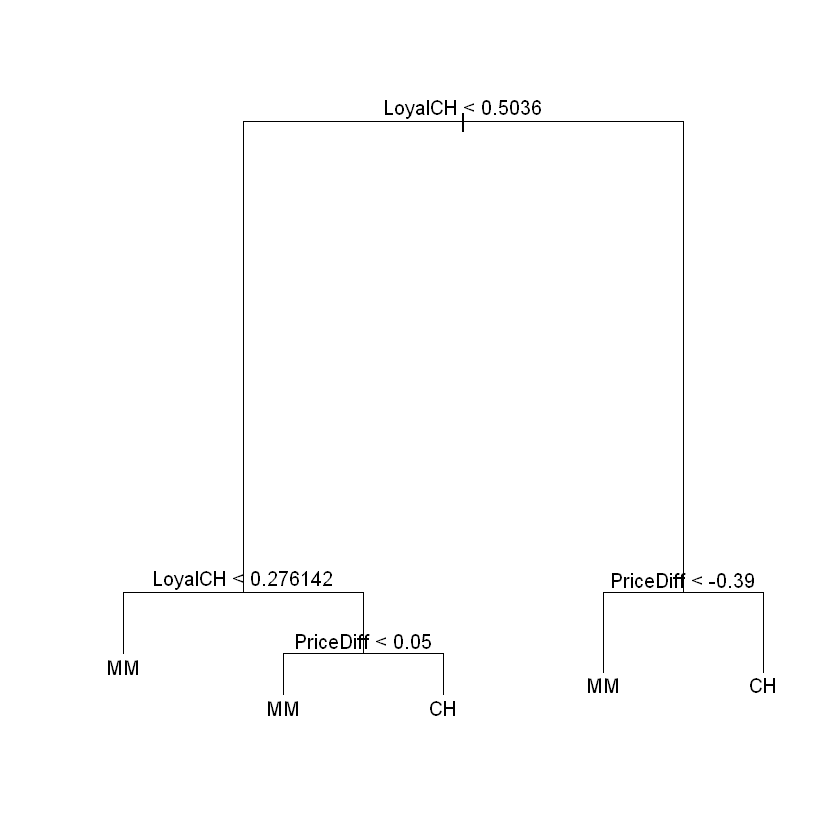

In [117]:
#i.
PM <- prune.misclass(MT, best = 5)
plot(PM)
text(PM)

In [118]:
#j.
summary(MT)


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7625 = 603.9 / 792 
Misclassification error rate: 0.165 = 132 / 800 

In [119]:
summary(PM)


Classification tree:
snip.tree(tree = MT, nodes = c(4L, 7L))
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  5 
Residual mean deviance:  0.826 = 656.6 / 795 
Misclassification error rate: 0.165 = 132 / 800 

In [43]:
#Exercise 10 (p.334, Chap.8)

In [122]:
#a.
Hit<-Hitters%>%drop_na(Salary)%>%mutate(Salary=log(Salary))

In [123]:
#b.
train<-Hit[1:200,]
test<-Hit[201:length(Hit),]

In [125]:
#c.
set.seed(123)
range <- seq(-10, -0.2, by = 0.1)
lambdas <- 10^range
MSE <- rep(NA, length(range))
for (i in 1:length(range)) {
    GBMM <- gbm(Salary ~ ., data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    prediction <- predict(GBMM, train, n.trees = 1000)
    MSE[i] <- mean((prediction - train$Salary)^2)
}

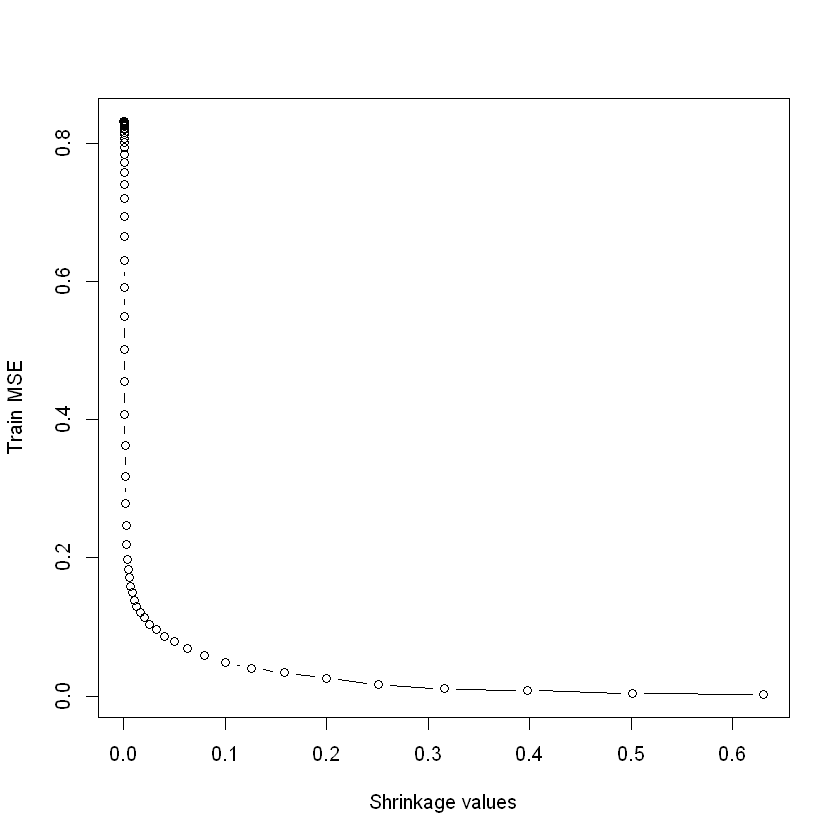

In [128]:
plot(lambdas, MSE, type = "b", xlab = "Shrinkage values", ylab = "Train MSE")

In [129]:
MSE <- rep(NA, length(range))
for (i in 1:length(range)) {
    GBMM <- gbm(Salary ~ ., data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    prediction <- predict(GBMM, test, n.trees = 1000)
    MSE[i] <- mean((prediction - test$Salary)^2)
}

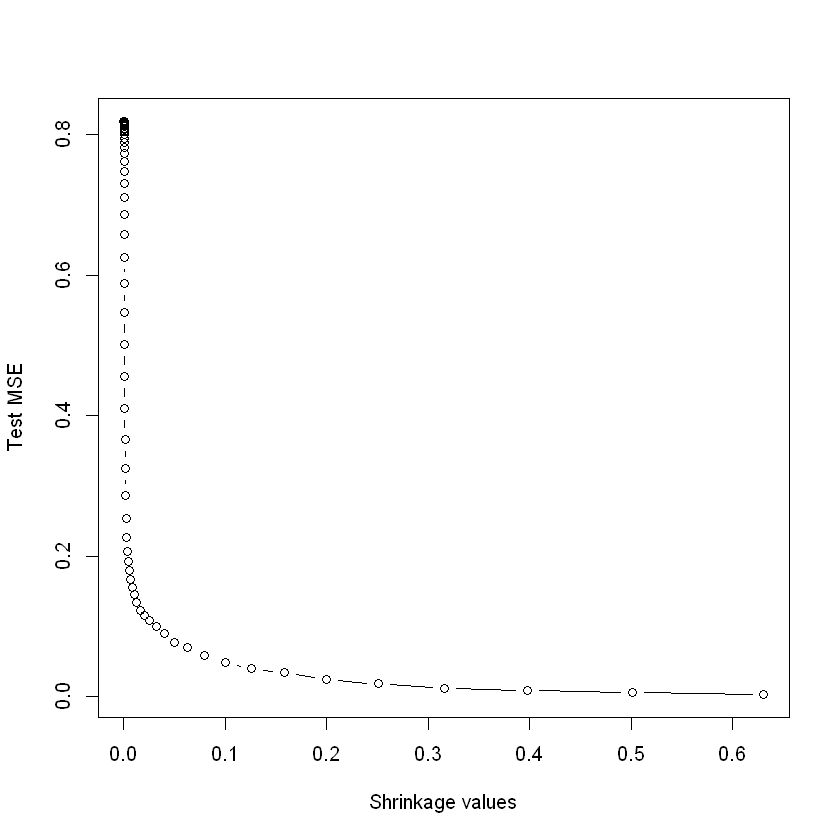

In [131]:
plot(lambdas, MSE, type = "b", xlab = "Shrinkage values", ylab = "Test MSE")

In [132]:
print(min(MSE))

[1] 0.003209864


In [133]:
print(lambdas[which.min(MSE)])

[1] 0.6309573


In [134]:
#e.
MLM <- lm(Salary ~ ., data = train)
prediction <- predict(MLM, test)
MLM_EROR<-mean((prediction - test$Salary)^2)
MLM_EROR

[1] 0.3196129

In [135]:
X_train <- model.matrix(Salary ~ ., data = train)
X_test <- model.matrix(Salary ~ ., data = test)
y_train <- train$Salary
MGL <- glmnet(X_train, y_train, alpha = 0)
prediction <- predict(MGL, s = 0.01, newx = X_test)
MGL_ERROR<-mean((prediction - test$Salary)^2)
MGL_ERROR

[1] 0.3359583

,var,rel.inf
,<chr>,<dbl>
CRBI,CRBI,23.5287261
PutOuts,PutOuts,9.3105210
CWalks,CWalks,8.5251821
RBI,RBI,8.0939570
Assists,Assists,6.9074653
Walks,Walks,5.7188581
HmRun,HmRun,5.5717851
AtBat,AtBat,5.3997128
CHmRun,CHmRun,4.7594566


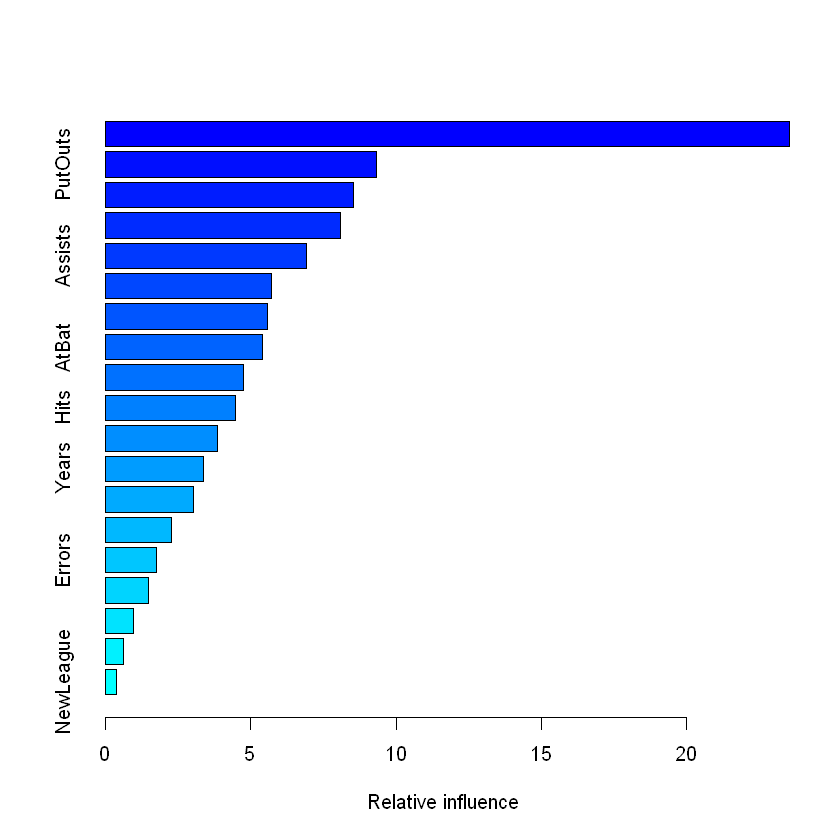

In [136]:
#f.
BH <- gbm(Salary ~ ., data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[which.min(MSE)])
summary(BH)

In [138]:
#part g
set.seed(123)
BG <- randomForest(Salary ~ ., data = train, mtry = 15, ntree = 100)
prediction <- predict(BG, test)
BG_ERROR<-mean((prediction - test$Salary)^2)
BG_ERROR

[1] 0.03628431